## Capstone Project - Default of Credit Card Clients

Prepared by Debora Callegari

### Imports

In [1]:
#Importing the necessary packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

### Step 10: Hyperparameter Optimization

#### Splitting the data and tuning hyparemeters

In [98]:
X_new = feat_eng_data.drop('default', axis=1)
y_new = feat_eng_data['default']

In [99]:
print("X_new shape:", X_new.shape)
print("y_new shape:", y_new.shape)

X_new shape: (29623, 80)
y_new shape: (29623,)


In [100]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, stratify = y_1, random_state=42)

In [101]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23698, 80)
y_train shape: (23698,)
X_test shape: (5925, 80)
y_test shape: (5925,)


In [102]:
#Transforming data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 10.1. Logistic Regression

In [103]:
# Applying Grid Search to find the best parameters

LR_model_new = LogisticRegression(class_weight='balanced')

param_grid = { 
    'C': np.logspace(-5,5,10),
    'penalty' :["l1","l2"]
}

CV_LR = GridSearchCV(estimator=LR_model_new, param_grid=param_grid, cv= 5)
CV_LR.fit(X_train, y_train)
CV_LR.best_params_

{'C': 0.2782559402207126, 'penalty': 'l1'}

In [104]:
CV_LR.best_estimator_

LogisticRegression(C=0.2782559402207126, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [105]:
# Evaluating the model
y_pred_train_LR_new = CV_LR.predict(X_train)
y_pred_test_LR_new = CV_LR.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_LR_new):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_LR_new):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_LR_new):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_LR_new):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_LR_new):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_LR_new):3.3f}")

Train Precision: 50.968
Train Recall: 56.281
Train F1: 53.493


Test Precision: 50.679
Test Recall: 56.990
Test F1: 53.650


In [106]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_LR_new))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4616
           1       0.51      0.57      0.54      1309

   micro avg       0.78      0.78      0.78      5925
   macro avg       0.69      0.71      0.70      5925
weighted avg       0.79      0.78      0.79      5925



[[3890  726]
 [ 563  746]]


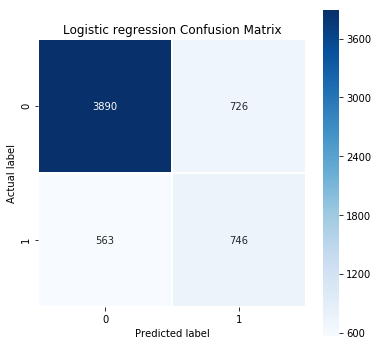

In [107]:
# Getting the confusion matrix
cm_LR_new = confusion_matrix(y_test, y_pred_test_LR_new)
print(cm_LR_new)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_LR_new, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Logistic regression Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 10.2. Decision Tree

In [108]:
# Applying Grid Search to find the best parameters

DT_model_new = DecisionTreeClassifier()

param_grid = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,12,16,20],
    'min_samples_leaf' : [1, 5, 10, 20, 50, 100],
    'criterion' :['entropy','gini'],
    'max_leaf_nodes' :[100,150,200]
}

CV_DT = GridSearchCV(estimator=DT_model_new, param_grid=param_grid, cv= 10)
CV_DT.fit(X_train, y_train)
CV_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'min_samples_leaf': 10}

In [109]:
# Evaluating the model 
y_pred_train_DT_new = CV_DT.predict(X_train)
y_pred_test_DT_new = CV_DT.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_DT_new):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_DT_new):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_DT_new):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_DT_new):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_DT_new):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_DT_new):3.3f}")

Train Precision: 69.632
Train Recall: 24.208
Train F1: 35.926


Test Precision: 68.623
Test Recall: 25.898
Test F1: 37.604


In [110]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_DT_new))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4616
           1       0.69      0.26      0.38      1309

   micro avg       0.81      0.81      0.81      5925
   macro avg       0.75      0.61      0.63      5925
weighted avg       0.79      0.81      0.77      5925



[[4461  155]
 [ 970  339]]


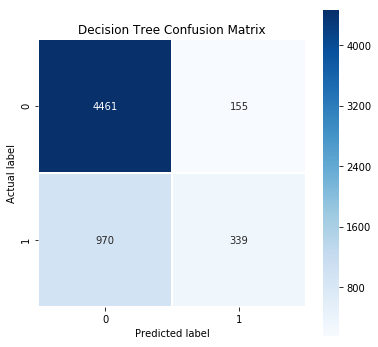

In [111]:
# Getting the confusion matrix
cm_DT_new = confusion_matrix(y_test, y_pred_test_DT_new)
print(cm_DT_new)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_DT_new, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Decision Tree Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 10.3. Support Vector Machines 

In [112]:
# Applying Grid Search to find the best parameters

SVC_model_new = SVC(class_weight='balanced', kernel='rbf')

param_grid = { 
    'C' : [50, 100, 150, 200, 300],
    'gamma': [1e-3, 1e-4, 1e-6, 1e-5, 0.1, 1]
}

CV_SVC = GridSearchCV(estimator=SVC_model_new, param_grid=param_grid, cv= 5)
CV_SVC.fit(X_train, y_train)
CV_SVC.best_params_

{'C': 50, 'gamma': 1e-06}

In [113]:
# Evaluating the model
y_pred_train_SVC_new = CV_SVC.predict(X_train)
y_pred_test_SVC_new = CV_SVC.predict(X_test)


print(f"Train Precision: {100*precision_score(y_train, y_pred_train_SVC_new):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_SVC_new):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_SVC_new):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_SVC_new):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_SVC_new):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_SVC_new):3.3f}")

Train Precision: 58.036
Train Recall: 46.812
Train F1: 51.823


Test Precision: 58.059
Test Recall: 48.434
Test F1: 52.811


In [114]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_SVC_new))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4616
           1       0.58      0.48      0.53      1309

   micro avg       0.81      0.81      0.81      5925
   macro avg       0.72      0.69      0.70      5925
weighted avg       0.80      0.81      0.80      5925



[[4158  458]
 [ 675  634]]


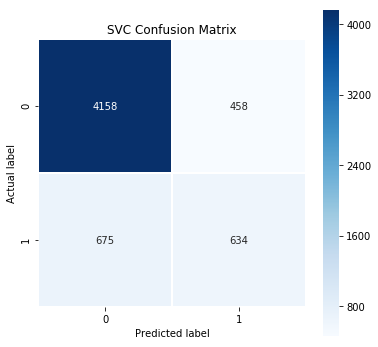

In [115]:
# Getting the confusion matrix
cm_SVC_new = confusion_matrix(y_test, y_pred_test_SVC_new)
print(cm_SVC_new)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_SVC_new, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('SVC Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 10.4. Random Forest

In [116]:
# Applying Grid Search to find the best parameters

RF_model_new = RandomForestClassifier()

param_grid = {
    'n_estimators': [100,150,200],
    'max_depth' : [5,10],
    'min_samples_split': [50, 100],
    'bootstrap': [True, False]
}

CV_RF = GridSearchCV(estimator=RF_model_new, param_grid=param_grid, cv= 5)
CV_RF.fit(X_train, y_train)
CV_RF.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'min_samples_split': 100,
 'n_estimators': 100}

In [117]:
# Evaluating the model

y_pred_train_RF_new = CV_RF.predict(X_train)
y_pred_test_RF_new = CV_RF.predict(X_test)


print(f"Train Precision: {100*precision_score(y_train, y_pred_train_RF_new):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_RF_new):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_RF_new):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_RF_new):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_RF_new):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_RF_new):3.3f}")

Train Precision: 75.571
Train Recall: 41.695
Train F1: 53.740


Test Precision: 67.945
Test Recall: 37.892
Test F1: 48.651


In [118]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_RF_new))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4616
           1       0.68      0.38      0.49      1309

   micro avg       0.82      0.82      0.82      5925
   macro avg       0.76      0.66      0.69      5925
weighted avg       0.81      0.82      0.80      5925



[[4382  234]
 [ 813  496]]


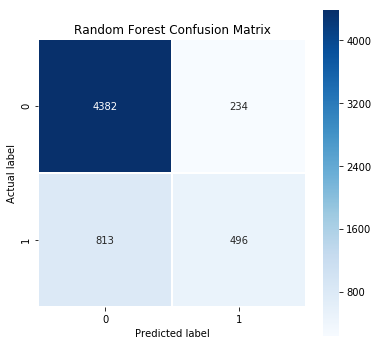

In [119]:
# Getting the confusion matrix
cm_RF_new = confusion_matrix(y_test, y_pred_test_RF_new)
print(cm_RF_new)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_RF_new, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Random Forest Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### 10.5. Gradient Boosting

In [120]:
# Applying Grid Search to find the best model and the best parameters

GB_model_new = GradientBoostingClassifier()

param_grid = { 
    'n_estimators' :[25,50,100,150],
    'min_samples_split' :[3,15,50]
}

CV_GB = GridSearchCV(estimator=GB_model_new, param_grid=param_grid, cv= 5)
CV_GB.fit(X_train, y_train)
CV_GB.best_params_

{'min_samples_split': 3, 'n_estimators': 50}

In [122]:
# Evaluating the model 
y_pred_train_GB_new = CV_GB.predict(X_train)
y_pred_test_GB_new = CV_GB.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_GB_new):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_GB_new):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_GB_new):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_GB_new):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_GB_new):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_GB_new):3.3f}")

Train Precision: 68.225
Train Recall: 35.949
Train F1: 47.087


Test Precision: 68.094
Test Recall: 37.662
Test F1: 48.500


In [123]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_GB_new))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4616
           1       0.68      0.38      0.48      1309

   micro avg       0.82      0.82      0.82      5925
   macro avg       0.76      0.66      0.69      5925
weighted avg       0.81      0.82      0.80      5925



[[4385  231]
 [ 816  493]]


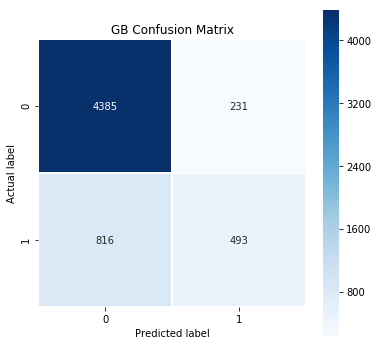

In [124]:
# Getting the confusion matrix
cm_GB_new = confusion_matrix(y_test, y_pred_test_GB_new)
print(cm_GB_new)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_GB_new, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('GB Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### Future approaches

Considering all the previous results, using the right evaluation metrics or trying feature engineering, I did not see a big improvement. The models don't appear to perform much better after feature engineering. The F1 score improved just a little bit and the false negatives were slightly lower in the models. Hence, the feature engineering didn't have a big impact on the methods I used.

Finally, I believe that some future approaches will provide better results and expand the goals for this project. Some of them are listed below: 

- Adding better features: I believe it is important to add features that would have the relevant financial information and would improve the final results.  

- Getting a longer history of payment: It's a challenge to define the number of data points that would be needed, however, it's usually better to train the model with bigger datasets. For instance, I could try the same models with 4 months of transactions history to see what the results would be in this case.

- Trying different approaches for imbalanced data: There are other options to handle imbalanced classes, such as resampling techniques (oversample minority class or undersample majority class), feature selection or SMOTE. Even though it's important to consider that information could be lost, I believe that trying different techniques and comparing the final results could be another approach to take.

- Getting a better classification algorithm and better hyper-parameters: It will be good to try an advanced implementation of the gradient boosting algorithm like XGBoost. Also, it is also a good technique that can work faster than the gradient boosting. Also, it will be one option try stacking the models because usually tend to have a high predictive influence in the results.

- Analyze the importance of each feature: Try to understand the coefficients and the importance of the features for the models and the correlation that the features have with the target variable (direct or indirect) and see how the model will perform after this approach.